<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/NetPrivateInvestment80s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

,W790RC1Q027SBEA
DATE,
1971-01-01,59.794
1971-04-01,61.119
1971-07-01,61.097
1971-10-01,52.963
1972-01-01,61.689


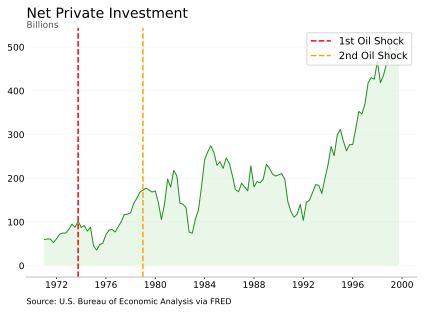

In [ ]:
# Define the OPEC years
start = datetime.datetime(1971, 1, 1)
end = datetime.datetime(1999, 12, 31)

# Pull Real GDP
investment = web.DataReader("W790RC1Q027SBEA", "fred", start, end)
investment.head()

x, y = investment.index, investment['W790RC1Q027SBEA']

# --- NYT-style colors ---
line_color     = "#228B22"  # forest green (main line)
fill_color     = "#d9f2d9"  # pale mint green fill
forecast_fill  = "#a8e6a3"  # medium light green for forecast shading
grid_color     = "#edf7ed"  # very light green-gray for grid


fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Net Private Investment', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Billions", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Economic Analysis via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

plt.axvline(datetime.datetime(1973, 10, 1), color='red', linestyle='--', label='1st Oil Shock')
plt.axvline(datetime.datetime(1979, 1, 1), color='orange', linestyle='--', label='2nd Oil Shock')
plt.legend(loc='upper right')

fig.savefig("net_private_investment.png", bbox_inches="tight", dpi=300)
plt.show()

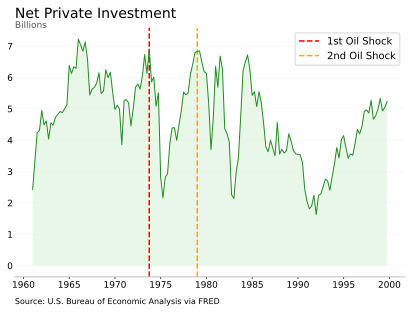

In [7]:
start = datetime.datetime(1961, 1, 1)
end   = datetime.datetime(1999, 12, 31)

# Net domestic investment, nominal (billions $)
investment = web.DataReader("W790RC1Q027SBEA", "fred", start, end)

# GDP, nominal (billions $)
gdp = web.DataReader("GDP", "fred", start, end)

# Ratio: investment as % of GDP
inv_share = (investment["W790RC1Q027SBEA"] / gdp["GDP"]) * 100

x, y = inv_share.index, inv_share.values

# --- NYT-style colors ---
line_color     = "#228B22"  # forest green (main line)
fill_color     = "#d9f2d9"  # pale mint green fill
forecast_fill  = "#a8e6a3"  # medium light green for forecast shading
grid_color     = "#edf7ed"  # very light green-gray for grid


fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Net Private Investment', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Billions", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Economic Analysis via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

plt.axvline(datetime.datetime(1973, 10, 1), color='red', linestyle='--', label='1st Oil Shock')
plt.axvline(datetime.datetime(1979, 1, 1), color='orange', linestyle='--', label='2nd Oil Shock')
plt.legend(loc='upper right')

fig.savefig("net_relative_private_investment.png", bbox_inches="tight", dpi=300)
plt.show()

In [9]:
fed_net_inv = web.DataReader("A890RC1Q027SBEA", "fred", start, end)  # federal net investment
priv_net_inv = web.DataReader("W790RC1Q027SBEA", "fred", start, end) # private net investment
gdp = web.DataReader("GDP", "fred", start, end)                       # nominal GDP

fed_share  = (fed_net_inv.iloc[:,0]  / gdp.iloc[:,0]) * 100
priv_share = (priv_net_inv.iloc[:,0] / gdp.iloc[:,0]) * 100

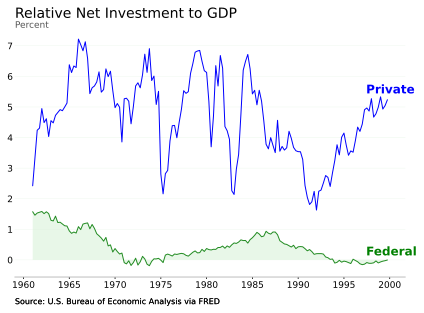

In [22]:
x, y = fed_share.index, fed_share.values

# --- NYT-style colors ---
line_color     = "#228B22"  # forest green (main line)
fill_color     = "#d9f2d9"  # pale mint green fill
forecast_fill  = "#a8e6a3"  # medium light green for forecast shading
grid_color     = "#edf7ed"  # very light green-gray for grid


fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

ax.plot(priv_share.index, priv_share.values, color='blue', linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")


# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Relative Net Investment to GDP', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Economic Analysis via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

ax.annotate("Private",
        xy = (0.9, 0.75),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        color='blue',
        weight='bold')

ax.annotate("Federal",
        xy = (0.9, 0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        color='green',
        weight='bold')

ax.annotate("Source: U.S. Bureau of Economic Analysis via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)



fig.savefig("net_relative_investment.png", bbox_inches="tight", dpi=300)
plt.show()